In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score 

In [2]:
# 윈도우용 한글깨짐 방지
from matplotlib import font_manager, rc
import matplotlib
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

In [3]:
test = pd.read_csv("./data/movies_test.csv")
train = pd.read_csv("./data/movies_train.csv")
sub = pd.read_csv("./data/submission.csv")

- title : 영화의 제목
- distributor : 배급사
- genre : 장르
- release_time : 개봉일
- time : 상영시간(분)
- screening_rat : 상영등급
- director : 감독이름
- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
- num_staff : 스텝수
- num_actor : 주연배우수
- box_off_num : 관객수

In [4]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [5]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [6]:
sub.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [7]:
train.shape

(600, 12)

In [8]:
test.shape

(243, 11)

In [9]:
sub.shape

(243, 2)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [12]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        243 non-null    object
 1   box_off_num  243 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ KB


In [13]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [14]:
test.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
count,243.000000,1.070000e+02,243.000000,243.000000,243.000000
mean,109.798354,8.916695e+05,0.851852,159.316872,3.477366
std,124.022711,1.217341e+06,1.200321,162.976607,2.111192
min,40.000000,3.400000e+01,0.000000,0.000000,0.000000
25%,91.000000,6.250200e+04,0.000000,18.000000,2.000000
50%,104.000000,4.931200e+05,0.000000,105.000000,3.000000
75%,114.500000,1.080850e+06,1.000000,282.000000,4.000000
max,2015.000000,6.173100e+06,6.000000,776.000000,16.000000


In [15]:
sub.describe()

,box_off_num
count,243.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [16]:
# 결측치 확인
train.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [17]:
test.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

In [18]:
# 중복값 확인
train.duplicated().sum()

0

In [19]:
test.duplicated().sum()

0

- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)

In [20]:
# dir_prev_bfnum 결측치 제거
train = train.drop(['dir_prev_bfnum'], axis = 1)
test = test.drop(['dir_prev_bfnum'], axis = 1)

In [21]:
# dir_prev_num 제거
train = train.drop(['dir_prev_num'], axis = 1)
test = test.drop(['dir_prev_num'], axis = 1)

In [22]:
train = train.sort_values('release_time')

In [23]:
test = test.sort_values('release_time')

In [24]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,num_staff,num_actor,box_off_num
109,카페 서울,나이너스엔터테인먼트(주),드라마,2010-01-02,94,12세 관람가,타케 마사하루,41,2,353
207,소규모 아카시아 밴드 이야기,이모션 픽처스,다큐멘터리,2010-01-14,90,12세 관람가,민환기,18,7,791
475,웨딩드레스,싸이더스,드라마,2010-01-14,109,전체 관람가,권형진,261,2,143458
46,페어 러브,CJ 엔터테인먼트,드라마,2010-01-14,117,12세 관람가,신연식,106,2,27083
228,회복,스토리셋,다큐멘터리,2010-01-14,94,12세 관람가,김종철,54,1,155281


In [25]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,380,1


### realtime 계절 변경

In [26]:
train['season'] = 0
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,num_staff,num_actor,box_off_num,season
109,카페 서울,나이너스엔터테인먼트(주),드라마,2010-01-02,94,12세 관람가,타케 마사하루,41,2,353,0
207,소규모 아카시아 밴드 이야기,이모션 픽처스,다큐멘터리,2010-01-14,90,12세 관람가,민환기,18,7,791,0
475,웨딩드레스,싸이더스,드라마,2010-01-14,109,전체 관람가,권형진,261,2,143458,0
46,페어 러브,CJ 엔터테인먼트,드라마,2010-01-14,117,12세 관람가,신연식,106,2,27083,0
228,회복,스토리셋,다큐멘터리,2010-01-14,94,12세 관람가,김종철,54,1,155281,0


In [27]:
train['month'] = train['release_time'].apply(lambda x: int(x[5:7]))
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,num_staff,num_actor,box_off_num,season,month
109,카페 서울,나이너스엔터테인먼트(주),드라마,2010-01-02,94,12세 관람가,타케 마사하루,41,2,353,0,1
207,소규모 아카시아 밴드 이야기,이모션 픽처스,다큐멘터리,2010-01-14,90,12세 관람가,민환기,18,7,791,0,1
475,웨딩드레스,싸이더스,드라마,2010-01-14,109,전체 관람가,권형진,261,2,143458,0,1
46,페어 러브,CJ 엔터테인먼트,드라마,2010-01-14,117,12세 관람가,신연식,106,2,27083,0,1
228,회복,스토리셋,다큐멘터리,2010-01-14,94,12세 관람가,김종철,54,1,155281,0,1


In [28]:
train.month.value_counts()

month
11    72
9     60
10    60
5     57
8     55
3     52
7     49
12    49
4     47
1     39
2     31
6     29
Name: count, dtype: int64

In [29]:
month_list = train.month.value_counts()

def func(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    elif month in [12, 1, 2]:
        return '겨울'

train['season'] = train['month'].apply(lambda x: func(x))

In [30]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,num_staff,num_actor,box_off_num,season,month
109,카페 서울,나이너스엔터테인먼트(주),드라마,2010-01-02,94,12세 관람가,타케 마사하루,41,2,353,겨울,1
207,소규모 아카시아 밴드 이야기,이모션 픽처스,다큐멘터리,2010-01-14,90,12세 관람가,민환기,18,7,791,겨울,1
475,웨딩드레스,싸이더스,드라마,2010-01-14,109,전체 관람가,권형진,261,2,143458,겨울,1
46,페어 러브,CJ 엔터테인먼트,드라마,2010-01-14,117,12세 관람가,신연식,106,2,27083,겨울,1
228,회복,스토리셋,다큐멘터리,2010-01-14,94,12세 관람가,김종철,54,1,155281,겨울,1


In [31]:
test['season'] = 0
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,num_staff,num_actor,season
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,304,3,0
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,275,3,0
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,419,7,0
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,408,2,0
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,380,1,0


In [32]:
test['month'] = test['release_time'].apply(lambda x: int(x[5:7]))
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,num_staff,num_actor,season,month
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,304,3,0,1
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,275,3,0,1
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,419,7,0,1
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,408,2,0,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,380,1,0,2


In [33]:
test.month.value_counts()

month
6     27
12    26
4     24
3     22
9     22
10    22
11    22
8     18
1     17
2     15
5     15
7     13
Name: count, dtype: int64

In [34]:
month_list = test.month.value_counts()

def func(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    elif month in [12, 1, 2]:
        return '겨울'

test['season'] = test['month'].apply(lambda x: func(x))

In [35]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,num_staff,num_actor,season,month
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,304,3,겨울,1
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,275,3,겨울,1
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,419,7,겨울,1
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,408,2,겨울,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,380,1,겨울,2


### 계절 시각화 > release_time 제외

In [36]:
train = train.drop(['release_time'], axis = 1)
test = test.drop(['release_time'], axis = 1)

In [37]:
train.head()

,title,distributor,genre,time,screening_rat,director,num_staff,num_actor,box_off_num,season,month
109,카페 서울,나이너스엔터테인먼트(주),드라마,94,12세 관람가,타케 마사하루,41,2,353,겨울,1
207,소규모 아카시아 밴드 이야기,이모션 픽처스,다큐멘터리,90,12세 관람가,민환기,18,7,791,겨울,1
475,웨딩드레스,싸이더스,드라마,109,전체 관람가,권형진,261,2,143458,겨울,1
46,페어 러브,CJ 엔터테인먼트,드라마,117,12세 관람가,신연식,106,2,27083,겨울,1
228,회복,스토리셋,다큐멘터리,94,12세 관람가,김종철,54,1,155281,겨울,1


<Axes: xlabel='season', ylabel='box_off_num'>

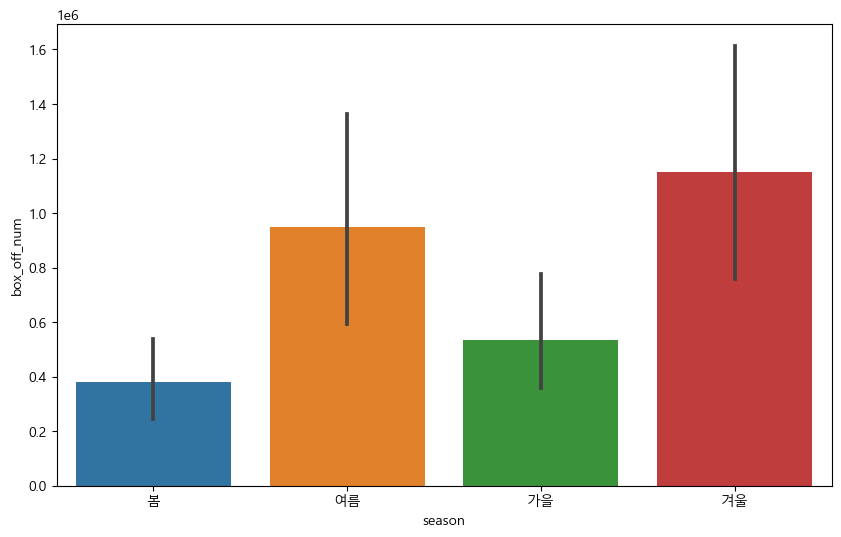

In [38]:
### [봄, 여름, 가을, 겨울] = [1, 2, 3, 4]
season_list = ['봄', '여름', '가을', '겨울']
plt.figure(figsize=(10, 6))
sns.barplot(y='box_off_num', x='season', data = train, order = season_list)

- 여름, 겨울에 영화를 더 많이 보는 것을 확인

In [39]:
train.screening_rat.value_counts()

screening_rat
청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: count, dtype: int64

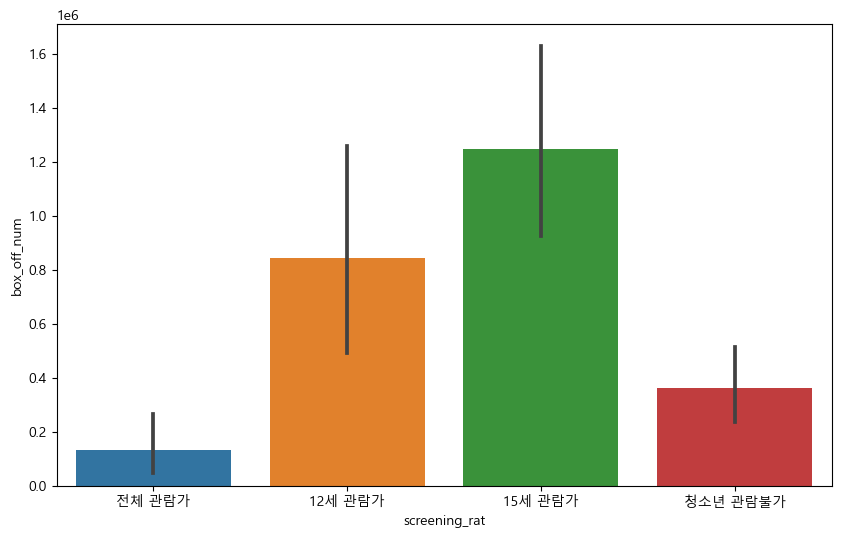

In [40]:
### 청불, 15세, 12세, 전체 = [1, 2, 3, 4]
plt.figure(figsize=(10, 6))
sns.barplot(y='box_off_num', x='screening_rat', data = train, order=['전체 관람가', '12세 관람가', '15세 관람가', '청소년 관람불가'])
plt.show()

- 12세, 15세 관람가 영화가 더 관객 수가 많은 것을 확인

## 원핫인코딩

In [57]:
def movieTrain_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        data = data.drop(column, axis=1)
    return data

movieTrain_columns = [['season', 'screening_rat']]
train_ohe = movieTrain_data(train, movieTrain_columns)
test_ohe = movieTrain_data(test, movieTrain_columns)

In [46]:
train.shape

(600, 11)

In [47]:
train_ohe.shape

(600, 17)

In [58]:
test.shape

(243, 10)

In [59]:
test_ohe.shape

(243, 16)

In [60]:
train_ohe = train_ohe.drop(['genre', 'director', 'num_actor', 'month', 'num_staff'], axis=1)
test_ohe = test_ohe.drop(['genre', 'director', 'num_actor', 'month', 'num_staff'], axis=1)

In [49]:
train_ohe

,title,distributor,time,box_off_num,season_가을,season_겨울,season_봄,season_여름,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
109,카페 서울,나이너스엔터테인먼트(주),94,353,False,True,False,False,True,False,False,False
207,소규모 아카시아 밴드 이야기,이모션 픽처스,90,791,False,True,False,False,True,False,False,False
475,웨딩드레스,싸이더스,109,143458,False,True,False,False,False,False,True,False
46,페어 러브,CJ 엔터테인먼트,117,27083,False,True,False,False,True,False,False,False
228,회복,스토리셋,94,155281,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
484,인 허 플레이스,홀리가든,115,1599,False,True,False,False,False,False,False,True
262,굿바이 그리고 헬로우,(주) 액티버스엔터테인먼트,82,329,False,True,False,False,True,False,False,False
535,조선마술사,롯데엔터테인먼트,122,627586,False,True,False,False,True,False,False,False
377,내부자들: 디 오리지널,(주)쇼박스,180,2084844,False,True,False,False,False,False,False,True


In [61]:
test_ohe

,title,distributor,time,season_가을,season_겨울,season_봄,season_여름,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,용서는 없다,시네마서비스,125,False,True,False,False,False,False,False,True
1,아빠가 여자를 좋아해,(주)쇼박스,113,False,True,False,False,True,False,False,False
2,하모니,CJ 엔터테인먼트,115,False,True,False,False,True,False,False,False
3,의형제,(주)쇼박스,116,False,True,False,False,False,True,False,False
4,평행 이론,CJ 엔터테인먼트,110,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
237,어떤이의 꿈,하준사,72,True,False,False,False,True,False,False,False
234,슬픈남자,비에이치제이 시네마,101,False,True,False,False,False,False,False,True
235,타이밍,(주)스톰픽쳐스코리아,100,False,True,False,False,False,True,False,False
236,타투,(주)다세포클럽,92,False,True,False,False,False,False,False,True


# 데이터 분할

In [62]:
x = train_ohe.iloc[:, 3:].values
y = train_ohe.iloc[:, 2].values

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [64]:
x_train

array([[9438, False, False, ..., False, True, False],
       [497994, False, True, ..., False, False, False],
       [2493, True, False, ..., True, False, False],
       ...,
       [1617, False, True, ..., False, False, True],
       [5693, False, False, ..., False, True, False],
       [303, True, False, ..., False, False, True]], dtype=object)

In [65]:
y_train

array([ 75, 120, 121, 114, 135, 108,  94, 107,  92, 106,  99, 131,  80,
        89, 112,  72,  75,  85, 115, 120, 124,  94, 132, 107,  95, 180,
       103,  99,  67,  98,  84,  85,  99, 104, 114,  88,  90,  94, 127,
        88,  72,  78,  94,  83,  91,  78,  90, 103,  75, 106, 106, 112,
       114,  89, 104, 100, 121, 120,  75, 122, 109, 106, 101, 135, 117,
       101,  96,  77,  98,  87, 112,  91,  69, 127, 133, 109,  89,  62,
        97, 132,  97,  82,  95,  99,  76, 120, 102,  98, 118,  90, 133,
        83, 120,  88,  99, 113,  85,  87, 106, 122, 117,  67, 109,  89,
        89, 139,  70,  83,  75, 118, 119,  82, 121,  74,  84, 107,  87,
       117,  96, 118,  71,  82, 115, 108,  92, 109, 117, 121,  84,  84,
       101, 112,  75,  89,  86,  83, 117,  91,  77,  80, 103, 118, 107,
        95,  88, 109, 103,  97, 102, 111, 121, 114,  80,  61, 114,  95,
       112,  92, 104, 120, 135,  94,  94, 112, 100, 101, 102, 111,  98,
        87,  85,  99,  84, 111, 153, 106, 100,  74, 112, 118, 11

###  Linear Regression

In [66]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [67]:
y_pred = lr.predict(x_test)
y_pred

array([ 87.19373522, 101.34504975, 105.33497013,  91.5307625 ,
        89.83728155, 100.7971939 ,  97.88283392, 101.4996631 ,
        97.72406224,  87.17542937,  97.744099  , 103.25804039,
       104.84383839, 100.38196463, 102.76003024, 100.59638007,
       111.55338184, 104.85197852, 103.24831815, 103.66259995,
        99.64594211, 101.42893909,  87.17673901,  89.83939617,
        90.35770727, 104.37333772, 100.09912426, 102.34151255,
        97.72524259, 132.53592528,  90.26088937, 100.3816977 ,
       100.80799571, 103.28260669,  98.04825282,  97.72051702,
       107.33505548,  97.71970371, 122.42636632, 100.1746475 ,
        97.74012001,  95.19574235, 100.608609  , 116.91098957,
       102.35067158,  87.18389202, 100.79918688, 103.67338159,
        95.19026185, 100.81351375, 100.59581236, 100.59044496,
       100.38302403, 100.38568086,  97.71889039, 100.38015448,
       100.38405006, 103.25095829,  95.1830588 , 109.94049752,
       104.15910887, 100.58671205,  99.8030877 ,  97.21

In [68]:
y_test

array([129, 106, 115, 109,  72, 115,  67, 107,  80, 136, 100, 120, 114,
        97, 144, 105, 118, 112,  94, 124, 126, 112,  93,  96,  75, 115,
       132, 113,  85, 124,  96,  80,  95,  95,  90,  89, 117,  96, 121,
        90,  88,  90, 140, 118,  96,  95,  89, 116,  91,  84, 104, 104,
        96,  97,  71,  74,  91,  94, 100, 135, 124,  80,  75, 105,  88,
       111,  75, 109,  74, 124,  82,  93, 113, 126,  99, 120,  98, 130,
        99,  97,  90,  91, 107, 121,  95,  75, 105,  91, 106,  72, 104,
       108, 125,  89,  80,  92,  92, 111, 100,  84,  91, 110, 121, 116,
       114, 113,  87,  86,  82, 121, 124,  73, 123, 120, 115, 133, 112,
        82,  90,  95], dtype=int64)

In [69]:
print('weight:', lr.coef_)
print('bias:', lr.intercept_)

weight: [ 4.17084823e-06 -8.00385363e-01  2.27761299e+00  1.86069521e+00
 -3.33792284e+00  1.45094429e+00  4.94121156e+00 -8.46859881e+00
  2.07644297e+00]
bias: 96.44279108166471


In [70]:
#훈련모델로 평가
lr.score(x_train, y_train)

0.2757824474357512

In [72]:
#테스트 모델로 평가
lr.score(x_test, y_test)

0.13924594791521605

In [73]:
test_ohe

,title,distributor,time,season_가을,season_겨울,season_봄,season_여름,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,용서는 없다,시네마서비스,125,False,True,False,False,False,False,False,True
1,아빠가 여자를 좋아해,(주)쇼박스,113,False,True,False,False,True,False,False,False
2,하모니,CJ 엔터테인먼트,115,False,True,False,False,True,False,False,False
3,의형제,(주)쇼박스,116,False,True,False,False,False,True,False,False
4,평행 이론,CJ 엔터테인먼트,110,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
237,어떤이의 꿈,하준사,72,True,False,False,False,True,False,False,False
234,슬픈남자,비에이치제이 시네마,101,False,True,False,False,False,False,False,True
235,타이밍,(주)스톰픽쳐스코리아,100,False,True,False,False,False,True,False,False
236,타투,(주)다세포클럽,92,False,True,False,False,False,False,False,True


In [74]:
test_ohe['box_off_num'] = 0

In [75]:
test_ohe

,title,distributor,time,season_가을,season_겨울,season_봄,season_여름,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가,box_off_num
0,용서는 없다,시네마서비스,125,False,True,False,False,False,False,False,True,0
1,아빠가 여자를 좋아해,(주)쇼박스,113,False,True,False,False,True,False,False,False,0
2,하모니,CJ 엔터테인먼트,115,False,True,False,False,True,False,False,False,0
3,의형제,(주)쇼박스,116,False,True,False,False,False,True,False,False,0
4,평행 이론,CJ 엔터테인먼트,110,False,True,False,False,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...
237,어떤이의 꿈,하준사,72,True,False,False,False,True,False,False,False,0
234,슬픈남자,비에이치제이 시네마,101,False,True,False,False,False,False,False,True,0
235,타이밍,(주)스톰픽쳐스코리아,100,False,True,False,False,False,True,False,False,0
236,타투,(주)다세포클럽,92,False,True,False,False,False,False,False,True,0


In [76]:
x = test_ohe.iloc[:, 2:-1].values

In [77]:
y_predict = lr.predict(x)
y_predict

array([100.79736839, 100.17181966, 100.17182801, 103.66209945,
       103.66207442, 103.66201186, 103.24513162, 100.38034634,
       103.24506489, 103.2451483 , 103.24514413, 103.24518584,
       103.24505654, 103.24508991,  99.75486852,  94.55631304,
        95.18166573,  84.63677411,  98.04647603,  84.63662396,
        98.04640513,  98.04647186,  97.71932833, 100.58392592,
        97.71930748, 100.58403436,  97.09371287,  97.09379629,
        97.71929914,  97.09376709, 100.7973392 , 100.17173625,
        90.2522432 , 100.79767286,  90.25240586, 103.66206191,
       103.24513579, 100.38032966, 100.38037137, 100.38032966,
       103.24510659, 103.24507323, 103.24510242, 103.24521504,
       100.38034217, 103.24521921, 103.24518584,  99.75486435,
        98.04655945,  95.18177835,  98.04654694,  98.04655945,
        95.18174915,  95.18177417,  84.6366031 ,  84.63661561,
        87.17422399,  97.71937004, 100.58401351,  97.09379629,
       100.58411361, 100.58407607,  97.09378795, 100.58

In [78]:
df = pd.DataFrame(y_predict)
df

,0
0,100.797368
1,100.171820
2,100.171828
3,103.662099
4,103.662074
...,...
238,97.093650
239,100.797268
240,103.662033
241,100.797231


In [81]:
sub['box_off_num'] = df
sub

,title,box_off_num
0,용서는 없다,100.797368
1,아빠가 여자를 좋아해,100.171820
2,하모니,100.171828
3,의형제,103.662099
4,평행 이론,103.662074
...,...,...
238,해에게서 소년에게,97.093650
239,울보 권투부,100.797268
240,어떤살인,103.662033
241,말하지 못한 비밀,100.797231


### Decision Tree

In [119]:
DecisionTree = DecisionTreeRegressor(random_state=42)
DecisionTree.fit(x_train, y_train)

score = DecisionTree.score(x_test, y_test)
print('r2_score :{0:.2f}'.format(score))

r2_score :-0.36


In [121]:
y_pred = DecisionTree.predict(x)
df = pd.DataFrame(y_pred)

In [122]:
df

,0
0,121.0
1,99.0
2,99.0
3,99.0
4,99.0
...,...
238,86.0
239,121.0
240,95.0
241,121.0


In [123]:
sub['box_off_num'] = df
sub

,title,box_off_num
0,용서는 없다,121.0
1,아빠가 여자를 좋아해,99.0
2,하모니,99.0
3,의형제,99.0
4,평행 이론,99.0
...,...,...
238,해에게서 소년에게,86.0
239,울보 권투부,121.0
240,어떤살인,95.0
241,말하지 못한 비밀,121.0


In [124]:
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
lgb_model = LGBMRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

model_list = [forest_model, lgb_model, xgb_model]

In [125]:
for model in model_list:
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test) 
    model_name = model.__class__.__name__
    print('{0} model_r2_score: {1:.2f}'.format(model_name, score))

RandomForestRegressor model_r2_score: 0.18
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 177
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 9
[LightGBM] [Info] Start training from score 100.568750
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

In [137]:
def printRegressorResult(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = model_r2_score(y_test, y_pred) 

In [139]:
print('MSE: {0:.3f}, RMSE:{1:.3f}, re:{2:3f}'.format(mse, rmse, r2))

NameError: name 'mse' is not defined

In [129]:
model_list = [lr, DecisionTree, forest_model, lgb_model, xgb_model]